In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from datetime import datetime, timedelta

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# declare a base using 'automap_base()'
Base = automap_base()
# use the base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station

Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date

'2017-08-23'

In [12]:
# change most_recent_date from a string to a date
most_recent_date_tf = datetime.strptime(most_recent_date, '%Y-%m-%d')

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_most_recent = most_recent_date_tf - timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_most_recent)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
rain_df = pd.DataFrame(precipitation_data, columns = ['Date', 'Precipitation'])

# Sort the dataframe by date
sorted_rain_df = rain_df.sort_values(by='Date')
sorted_rain_df.head()

,Date,Precipitation
0,2016-08-24,0.08
1006,2016-08-24,NaN
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15


<Axes: xlabel='Date'>

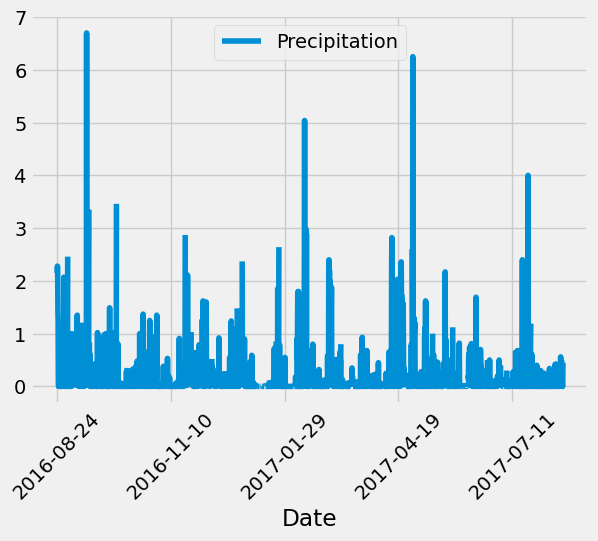

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
sorted_rain_df.plot (x = 'Date', y = 'Precipitation', rot = 45)

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = sorted_rain_df.describe()
summary_stats

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).all()
total_stations

[(9,)]

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order
station_count = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).filter(Measurement.station == 'USC00519281')
most_active = pd.DataFrame(most_active)

min_temp = most_active["tobs"].min()

max_temp = most_active["tobs"].max()

avg_temp = most_active["tobs"].mean()

print("Station USC00519281 is the most active")
print("Lowest temperture was " + str(min_temp))
print("Highest temperture was " + str(max_temp))
print("Average Temperture was " + str(avg_temp))

Station USC00519281 is the most active
Lowest temperture was 54.0
Highest temperture was 85.0
Average Temperture was 71.66378066378067


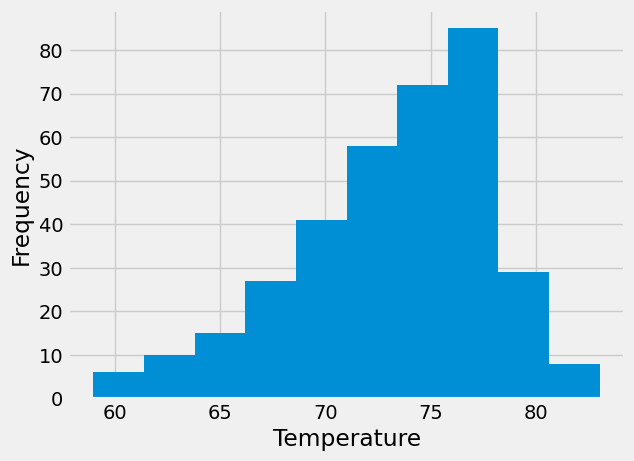

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_one_year = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).filter(Measurement.station == 'USC00519281', Measurement.date >= one_year_most_recent)
most_active_one_year
most_active_one_year= pd.DataFrame(most_active_one_year)
most_active_one_year

plt.hist(most_active_one_year["tobs"])
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [22]:
# Close Session
session.close()